In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
all_files = os.listdir(".")
data_files = [f for f in all_files if ".csv" in f and "bh_graph" in f]
print(data_files)

['bh_graph-1D-grid-nonpbc-qubitnodes_Lx-22_U-40_enc-stdbinary_d-4.csv', 'bh_graph-1D-grid-nonpbc-qubitnodes_Lx-16_U-10_enc-stdbinary_d-4.csv', 'bh_graph-2D-grid-nonpbc-qubitnodes_Lx-5_Ly-5_U-100_enc-unary_d-4.csv', 'bh_graph-1D-grid-nonpbc-qubitnodes_Lx-10_U-2_enc-stdbinary_d-4.csv', 'bh_graph-1D-grid-nonpbc-qubitnodes_Lx-12_U-2_enc-unary_d-4.csv', 'bh_graph-1D-grid-pbc-qubitnodes_Lx-4_U-2_enc-unary_d-4.csv', 'bh_graph-1D-grid-nonpbc-qubitnodes_Lx-10_U-2_enc-unary_d-4.csv', 'bh_graph-1D-grid-nonpbc-qubitnodes_Lx-22_U-40_enc-unary_d-4.csv', 'bh_graph-1D-grid-nonpbc-qubitnodes_Lx-12_U-2_enc-stdbinary_d-4.csv', 'bh_graph-1D-grid-nonpbc-qubitnodes_Lx-16_U-10_enc-unary_d-4.csv', 'bh_graph-1D-grid-pbc-qubitnodes_Lx-4_U-2_enc-stdbinary_d-4.csv']


In [3]:
def get_dimension_from_fname(fname):
    matches = re.search('Lx-\\d+', fname)
    matching_text = matches.group()
    return int(matching_text[3:])

In [4]:
dimensions = {}
dataframes = {}
is_unary = {}
for dfile in data_files:
    dimensions[dfile] = get_dimension_from_fname(dfile)
    df = pd.read_csv(dfile)
    dataframes[dfile] = df.copy()
    if "unary" in dfile:
        is_unary[dfile] = True
    else:
        is_unary[dfile] = False

In [5]:
# Get kstar for each dataset.
kstars = {}
for dfile in data_files:
    df = dataframes[dfile]
    k = df["i"].to_numpy() + 1 # k values in original program are off by one
    rhats = df["rhat"].to_numpy()
    i_max = np.argmax(rhats)
    kstar = k[i_max]
    kstars[dfile] = kstar
    max_k = np.max(k)
    rhat_ratio = np.max(rhats) / np.min(rhats)
    print(dfile, dimensions[dfile], is_unary[dfile], kstar, max_k, rhat_ratio)

bh_graph-1D-grid-nonpbc-qubitnodes_Lx-22_U-40_enc-stdbinary_d-4.csv 22 False 44 44 1.0454886991307317
bh_graph-1D-grid-nonpbc-qubitnodes_Lx-16_U-10_enc-stdbinary_d-4.csv 16 False 32 32 1.1416155101539944
bh_graph-2D-grid-nonpbc-qubitnodes_Lx-5_Ly-5_U-100_enc-unary_d-4.csv 5 True 4 100 1.0549698582953762
bh_graph-1D-grid-nonpbc-qubitnodes_Lx-10_U-2_enc-stdbinary_d-4.csv 10 False 20 20 1.3275324280491494
bh_graph-1D-grid-nonpbc-qubitnodes_Lx-12_U-2_enc-unary_d-4.csv 12 True 4 48 1.6564577182010565
bh_graph-1D-grid-pbc-qubitnodes_Lx-4_U-2_enc-unary_d-4.csv 4 True 4 16 1.6454201899152596
bh_graph-1D-grid-nonpbc-qubitnodes_Lx-10_U-2_enc-unary_d-4.csv 10 True 4 40 1.6703775657790447
bh_graph-1D-grid-nonpbc-qubitnodes_Lx-22_U-40_enc-unary_d-4.csv 22 True 4 88 1.0716008692100594
bh_graph-1D-grid-nonpbc-qubitnodes_Lx-12_U-2_enc-stdbinary_d-4.csv 12 False 24 24 1.3275873677715988
bh_graph-1D-grid-nonpbc-qubitnodes_Lx-16_U-10_enc-unary_d-4.csv 16 True 4 64 1.241773378241682
bh_graph-1D-grid-pbc-q

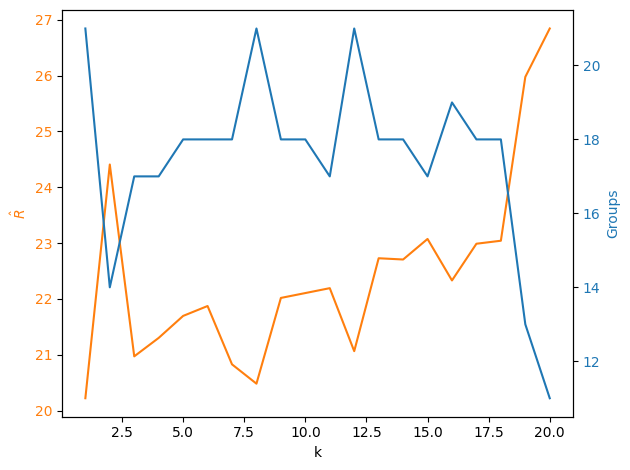

In [6]:
df = dataframes[data_files[3]]
kvals = df["i"].to_numpy() + 1
rhats = df["rhat"].to_numpy()
groups = df["ngroups"].to_numpy()

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('k')
ax1.set_ylabel(r'$\hat{R}$', color=color)
ax1.plot(kvals, rhats, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Groups', color=color)  # we already handled the x-label with ax1
ax2.plot(kvals, groups, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig("bose_hubbard.pdf")